In [1]:
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.initializers import GlorotNormal , GlorotUniform , HeNormal , HeUniform
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential

2024-11-11 16:59:47.426479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731324587.442807   44170 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731324587.447696   44170 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 16:59:47.463620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train , y_train) , (x_test , Y_test) = cifar10.load_data()

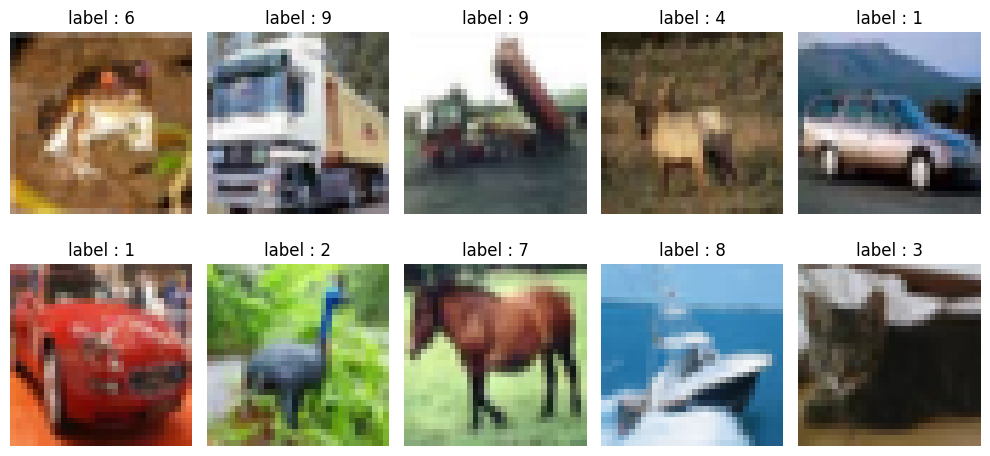

In [3]:
fig , axes = plt.subplots(2,5,figsize=(10,5))

for i , ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f'label : { y_train[i][0]}')
    
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
model = Sequential([
    Flatten(input_shape = (32,32,3,)),
    Dense(512 , activation='relu'),
    Dense(256 , activation='relu'),
    Dense(128 , activation='relu'),
    Dense(10 , activation='softmax')

])

/home/aswin/Desktop/GIT/Deeplearning-using-Tensorflow/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1731324604.611136   44170 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['accuracy'])

In [9]:
model.fit(x_train,y_train , validation_data=(x_test,Y_test) , epochs = 1)

2024-11-11 17:00:16.338742: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2728 - loss: 2.0034

2024-11-11 17:00:53.600702: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.2728 - loss: 2.0033 - val_accuracy: 0.3802 - val_loss: 1.7367


In [10]:
pred = model.predict(x_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 39s 127ms/step

2024-11-11 17:00:56.365188: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


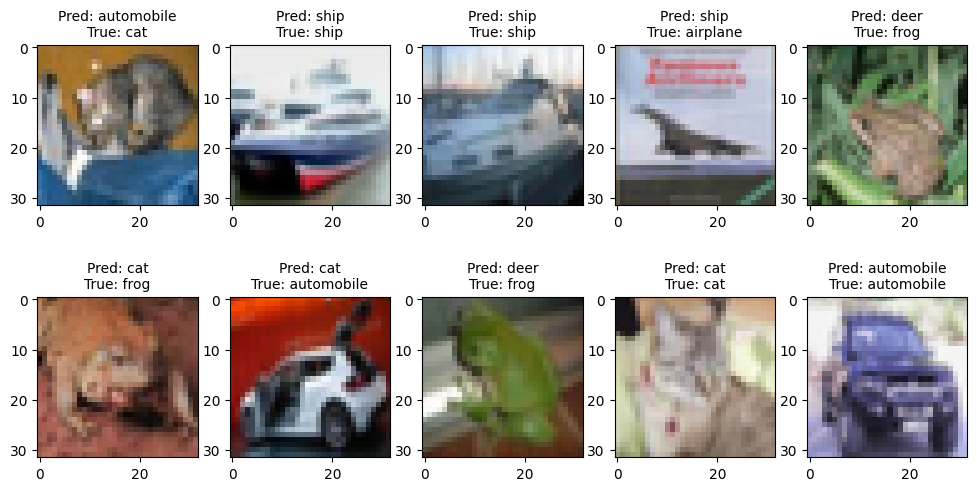

In [13]:
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[i])
    predicted_label = np.argmax(pred[i])
    true_label = Y_test[i][0]
    
    ax.set_title(f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}', fontsize=10)
    #ax.axis('off')


#plt.tight_layout(pad=2.0)
plt.show()




<BarContainer object of 10 artists>

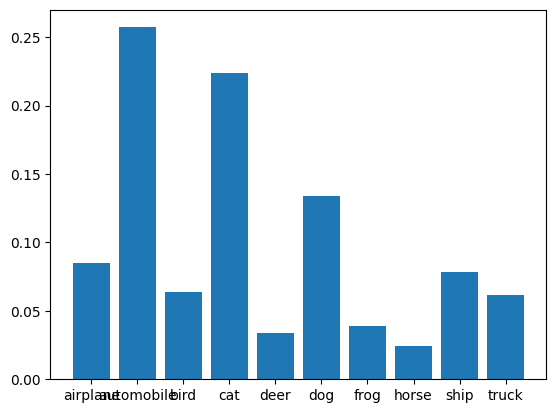

In [12]:
plt.bar(class_names,pred[0])